In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
#from statsmodels.nonparametric.kde import KDEUniveriate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from sklearn.ensemble import RandomForestClassifier
#from KaggleAux import predict as ka

In [31]:
df = pd.read_csv("train.csv")

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
#df.describe()

In [33]:
df = df.drop(['Ticket','Cabin'], axis=1)

In [35]:
df = df.dropna()

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S


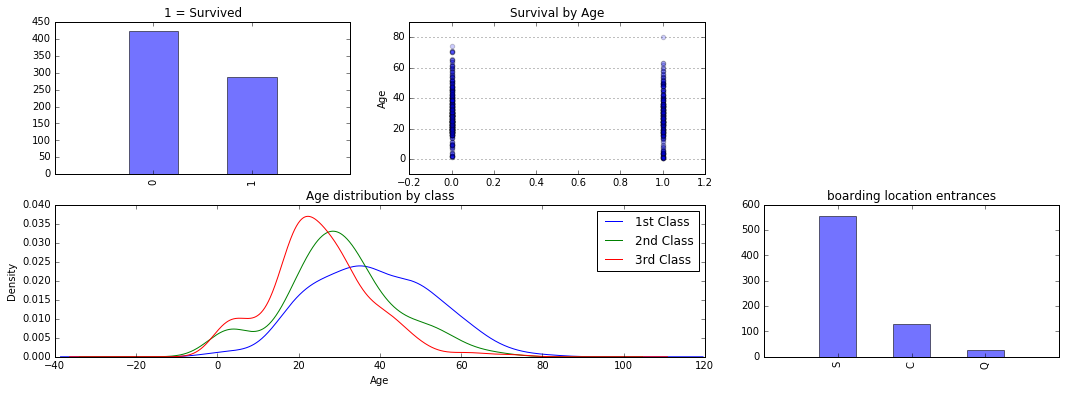

In [126]:
fig = plt.figure(figsize = (18,6), dpi = 1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55
#can plot many different graphs together
axl = plt.subplot2grid((2,3),(0,0))
#bar chart survival
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
#margin formatting
axl.set_xlim(-1, 2)
plt.title('1 = Survived')

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel('Age')
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age")

plt.subplot2grid((2,3),(1,0), colspan=2)
#kernel density estimate of age
df.Age[df.Pclass==1].plot(kind='kde')
df.Age[df.Pclass==2].plot(kind='kde')
df.Age[df.Pclass==3].plot(kind='kde')
#axis label
plt.xlabel('Age')
plt.title('Age distribution by class')
#legend
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc ='best')

ax5=plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar',alpha=alpha_bar_chart)
ax5.set_xlim(-1,len(df.Embarked.value_counts()))
plt.title('boarding location entrances')

In [65]:
#plt.subplot2grid((2,3),(0,1))
#plt.scatter(df.Survived, df.Sex, alpha=alpha_scatterplot)
#plt.ylabel('Gender')
#plt.grid(b=True, which='major', axis='y')
#plt.title("Survival by Gender")

In [132]:
#Logistic Regression

formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'
#dictionary to hold results
results = {}

In [142]:
y,x = dmatrices(formula, data=df, return_type='dataframe')

model = sm.Logit(y,x)
res = model.fit()

results['Logit']=[res,formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


TypeError: 'RandomForestClassifier' object does not support item assignment

(-1, 712)

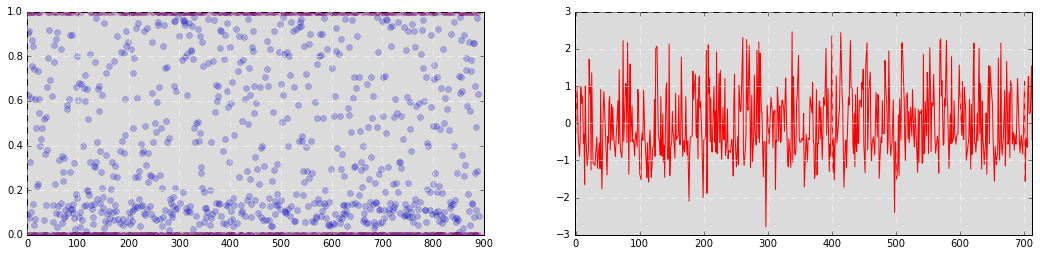

In [136]:
plt.figure(figsize=(18,4));

plt.subplot(121, axisbg ="#DBDBDB")
#generate predictions
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')

#resids
ax2 = plt.subplot(122, axisbg = "#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))

In [76]:
test_data = pd.read_csv("test.csv")

In [78]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [79]:
test_data['Survived'] = 1.23

{'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x11f6159d0>,
  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)']}

In [140]:
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'
results = RandomForestClassifier(n_estimators=100).fit(x,y)
#print results
print "Random Forest Prediction Score: {0}".format(score)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Random Forest Prediction Score: 0.945224719101
